In [1]:
from __future__ import division, print_function
import time

import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
from matplotlib.gridspec import GridSpec

from scipy.optimize import curve_fit

mpl.rcParams['axes.labelsize'] = 14
mpl.rcParams['ytick.labelsize'] = 12
mpl.rcParams['xtick.labelsize'] = 12
mpl.rcParams['legend.fontsize'] = 14
mpl.rcParams['axes.titlesize'] = 16

colours = plt.rcParams['axes.prop_cycle'].by_key()['color']

#from skimage.filters import threshold_otsu, threshold_mean

from PIL import Image
from mpl_toolkits.axes_grid1 import make_axes_locatable
from pathlib import Path

#import utils
from classifier_train2 import classifier_train2
from runAnalysis2_RG import runAnalysisN 
# from Bayes4class import maximum_likelihood_estimate_4class

from scipy.optimize import fsolve
import warnings
warnings.filterwarnings('default')

import pandas as pd

## Simple Ramsey Experimental Data Sets

### Claire_ramseydata 
### Set #1: Static
Wwait time = 40ms. Each point has 500 repetitions and the whole experiment went for ~30mins.

In [2]:
#global parameters
prefix = './Claire_ramseydata/'

year = '2018'
date = '20181010'
# runAnalysis global parameters
points=None
ions=6


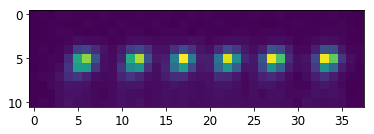

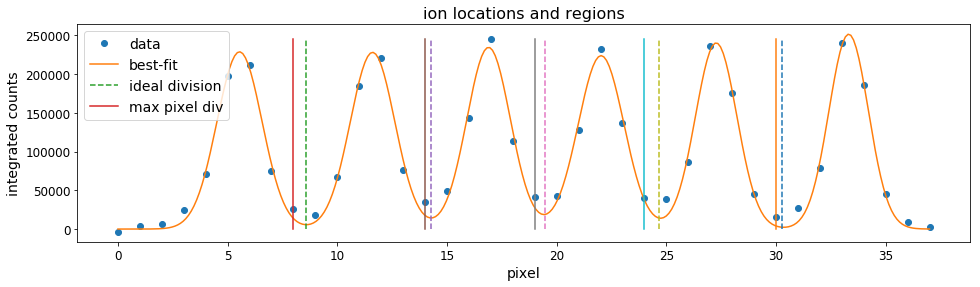

Ion 0
image width 9 pixels from 0 to 8
Cross-validation accuracy: 0.980 +/- 0.013
Ion 1
image width 6 pixels from 9 to 14
Cross-validation accuracy: 0.972 +/- 0.017
Ion 2
image width 5 pixels from 15 to 19
Cross-validation accuracy: 0.970 +/- 0.020
Ion 3
image width 5 pixels from 20 to 24
Cross-validation accuracy: 0.969 +/- 0.020
Ion 4
image width 6 pixels from 25 to 30
Cross-validation accuracy: 0.968 +/- 0.020
Ion 5
image width 7 pixels from 31 to 37
Cross-validation accuracy: 0.966 +/- 0.019
read 51 data points with 500 repetitions (None points, 500 repetitions requested)
image width 9 pixels from 0 to 8
image width 6 pixels from 9 to 14
image width 5 pixels from 15 to 19
image width 5 pixels from 20 to 24
image width 6 pixels from 25 to 30
image width 7 pixels from 31 to 37

115434


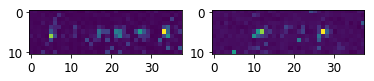

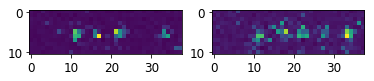

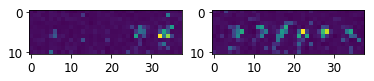

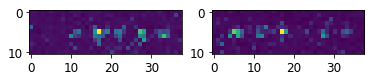

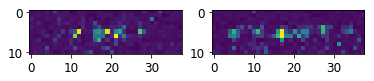

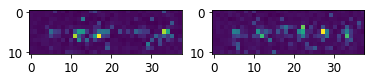

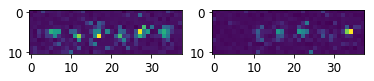

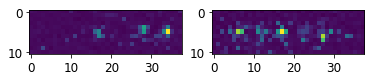

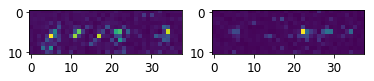

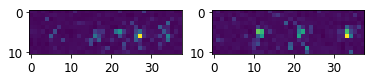

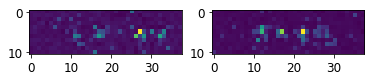

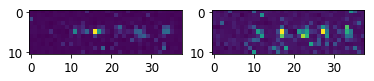

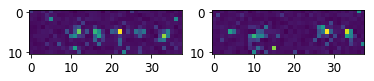

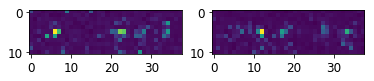

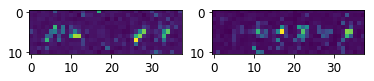

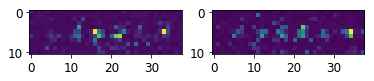

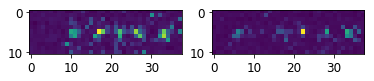

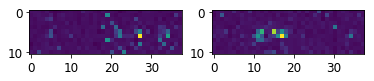

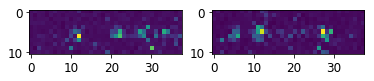

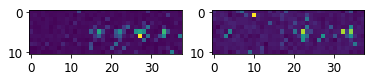

In [3]:
img_shape = (11, 38)
totpxl = img_shape[0] * img_shape[1]
repetitions = 500 # during calibration
reps=500 # during testing
brightID = '115321'
darkID = '115302'

clf, div, scores = classifier_train2(ions,repetitions,img_shape,prefix,year,date,brightID,darkID)

fileID_Igor_list = ['115434']

for fileID_Igor in fileID_Igor_list:
    
    runAnalysisN(ions, prefix, year, date, fileID_Igor, reps, 1, img_shape, div, clf, points)
    zf =prefix + year+ '/' + date + '/' + date +'-'+fileID_Igor +'/cimg' + date + '-' + fileID_Igor + '.dat'
    datacube = pd.read_csv(str(zf), sep="\t", header=None)
    
    print()
    print(fileID_Igor)
        
    for n in range(0, int(reps / 5), 5):
        
        fig = plt.figure()
        
        for idx in range(2):
            ax = fig.add_subplot(1, 2, idx + 1)
            pic = datacube.values[idx, n*totpxl : n*totpxl + totpxl].reshape(img_shape[0], img_shape[1])
            ax.imshow(pic)
        
        plt.show()

### Set #2: Scanned
Standard Ramsey, 6 ions, wait time = SCANNED from 0 - 250ms. Each point has 50 repetitions.

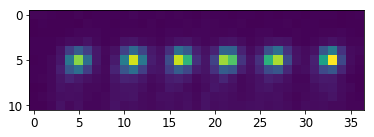

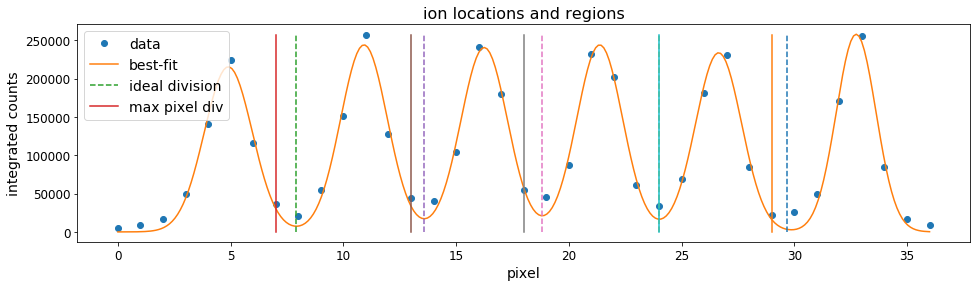

Ion 0
image width 8 pixels from 0 to 7
Cross-validation accuracy: 0.947 +/- 0.024
Ion 1
image width 6 pixels from 8 to 13
Cross-validation accuracy: 0.962 +/- 0.024
Ion 2
image width 5 pixels from 14 to 18
Cross-validation accuracy: 0.962 +/- 0.025
Ion 3
image width 6 pixels from 19 to 24
Cross-validation accuracy: 0.965 +/- 0.024
Ion 4
image width 5 pixels from 25 to 29
Cross-validation accuracy: 0.966 +/- 0.022
Ion 5
image width 7 pixels from 30 to 36
Cross-validation accuracy: 0.967 +/- 0.021
read 27 data points with 50 repetitions (None points, 50 repetitions requested)
image width 8 pixels from 0 to 7
image width 6 pixels from 8 to 13
image width 5 pixels from 14 to 18
image width 6 pixels from 19 to 24
image width 5 pixels from 25 to 29
image width 7 pixels from 30 to 36

114733


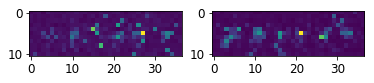

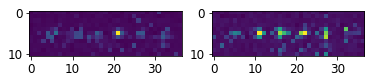

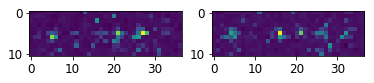

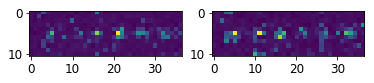

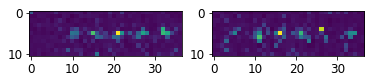

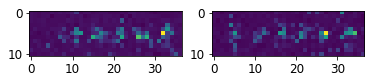

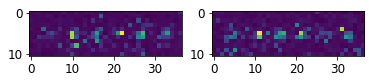

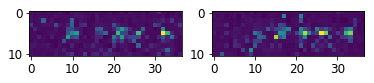

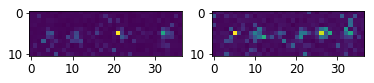

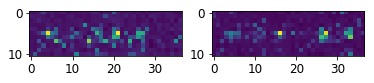

In [4]:
img_shape = (11, 37)
totpxl = img_shape[0] * img_shape[1] # total length of a vectorised image
repetitions = 500 # during calibration
reps=50 # during testing
brightID = '112031'
darkID = '111751'
# pi / 2 index : 8 point

clf, div, scores = classifier_train2(ions,repetitions,img_shape,prefix,year,date,brightID,darkID)

fileID_Igor_list = ['114733']

for fileID_Igor in fileID_Igor_list:
    
    runAnalysisN(ions, prefix, year, date, fileID_Igor, reps, 1, img_shape, div, clf, points)
    zf =prefix + year+ '/' + date + '/' + date +'-'+fileID_Igor +'/cimg' + date + '-' + fileID_Igor + '.dat'
    datacube = pd.read_csv(str(zf), sep="\t", header=None)
    
    print()
    print(fileID_Igor)
        
    for n in range(0, int(reps / 5), 1):
        
        fig = plt.figure()
        
        for idx in range(2):
            ax = fig.add_subplot(1, 2, idx + 1)
            pic = datacube.values[idx, n*totpxl : n*totpxl + totpxl].reshape(img_shape[0], img_shape[1])
            ax.imshow(pic)
        
        plt.show()

## Modified Ramsey Experimental Data Sets (pA and pB)

In [5]:
#global parameters
prefix = './Riddhi_SLAM/'
img_shape = (11, 33)
year = '2018'
date = '20181008'

# runAnalysis global parameters
points=None
ions=5

### Riddhi_SLAM Set #1

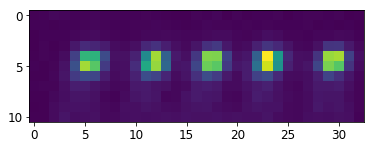

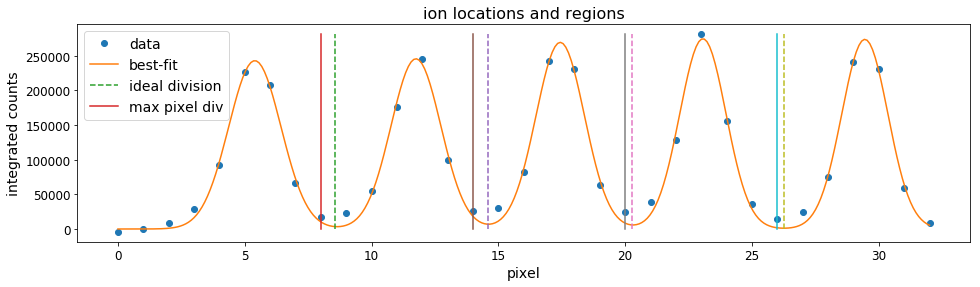

Ion 0
image width 9 pixels from 0 to 8
Cross-validation accuracy: 0.967 +/- 0.013
Ion 1
image width 6 pixels from 9 to 14
Cross-validation accuracy: 0.957 +/- 0.022
Ion 2
image width 6 pixels from 15 to 20
Cross-validation accuracy: 0.957 +/- 0.021
Ion 3
image width 6 pixels from 21 to 26
Cross-validation accuracy: 0.956 +/- 0.021
Ion 4
image width 6 pixels from 27 to 32
Cross-validation accuracy: 0.956 +/- 0.021
read 2 data points with 100 repetitions (None points, 100 repetitions requested)
image width 9 pixels from 0 to 8
image width 6 pixels from 9 to 14
image width 6 pixels from 15 to 20
image width 6 pixels from 21 to 26
image width 6 pixels from 27 to 32

210051


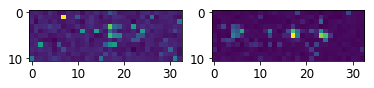

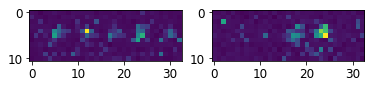

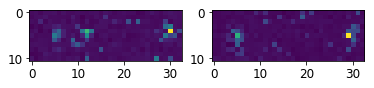

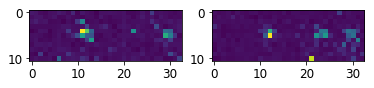

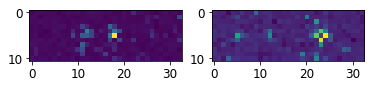

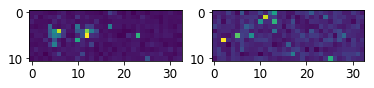

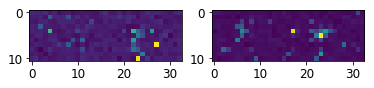

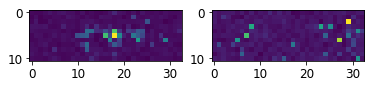

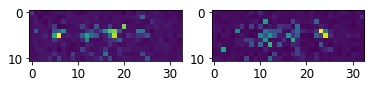

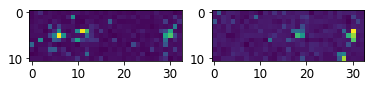

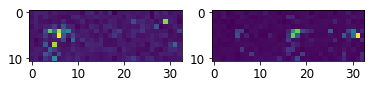

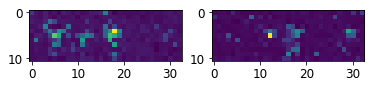

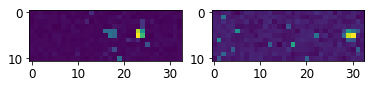

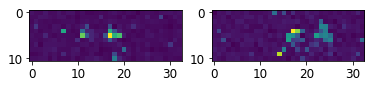

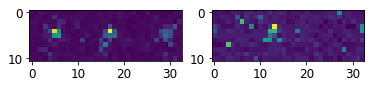

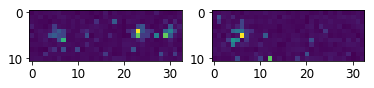

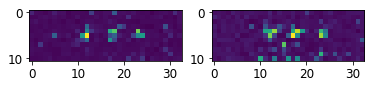

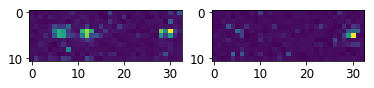

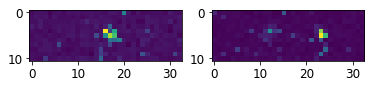

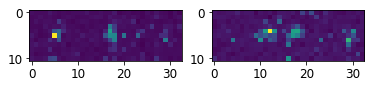

read 2 data points with 100 repetitions (None points, 100 repetitions requested)
image width 9 pixels from 0 to 8
image width 6 pixels from 9 to 14
image width 6 pixels from 15 to 20
image width 6 pixels from 21 to 26
image width 6 pixels from 27 to 32

210123


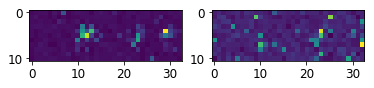

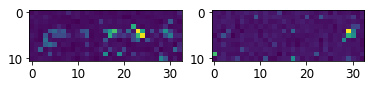

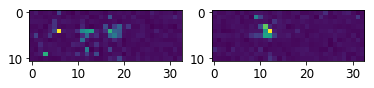

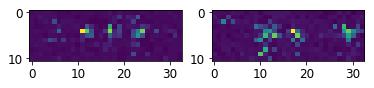

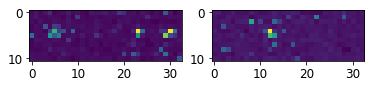

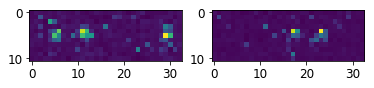

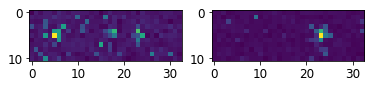

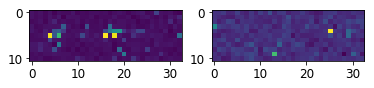

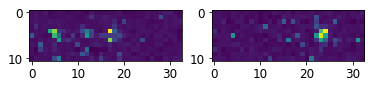

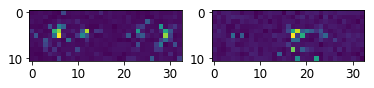

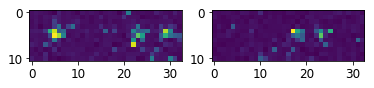

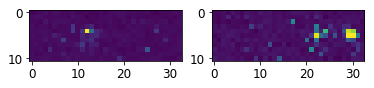

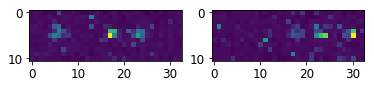

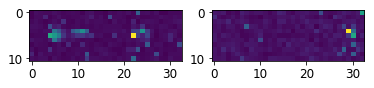

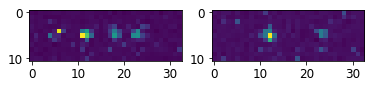

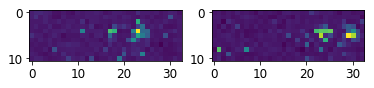

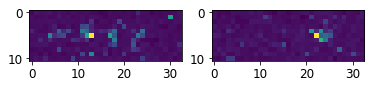

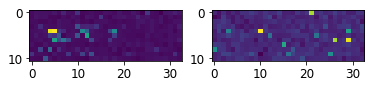

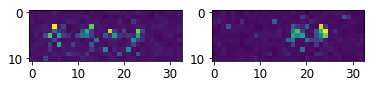

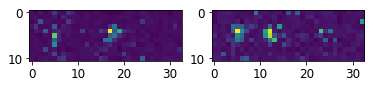

read 2 data points with 100 repetitions (None points, 100 repetitions requested)
image width 9 pixels from 0 to 8
image width 6 pixels from 9 to 14
image width 6 pixels from 15 to 20
image width 6 pixels from 21 to 26
image width 6 pixels from 27 to 32

210159


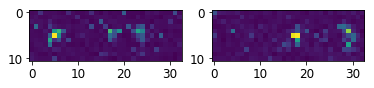

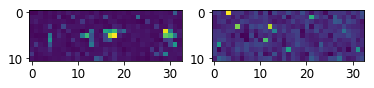

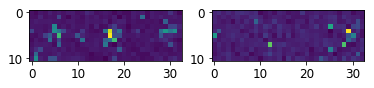

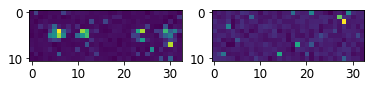

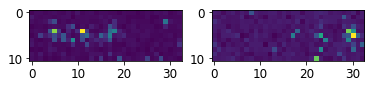

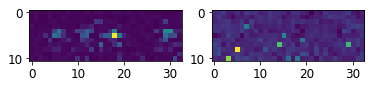

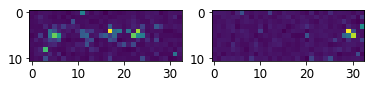

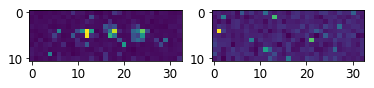

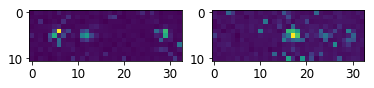

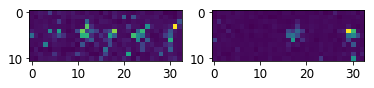

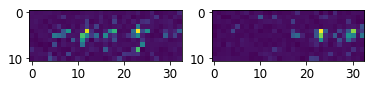

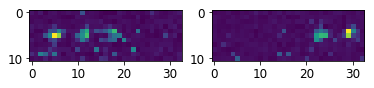

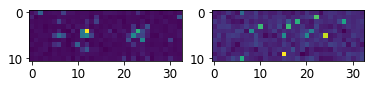

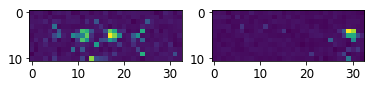

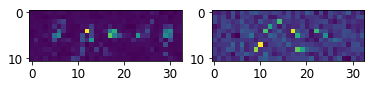

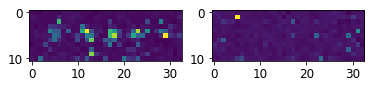

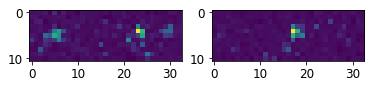

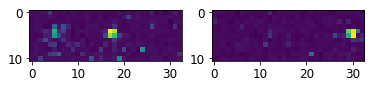

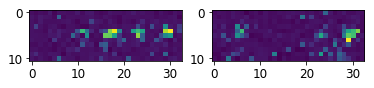

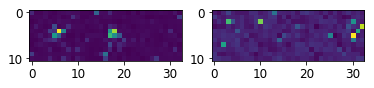

read 2 data points with 100 repetitions (None points, 100 repetitions requested)
image width 9 pixels from 0 to 8
image width 6 pixels from 9 to 14
image width 6 pixels from 15 to 20
image width 6 pixels from 21 to 26
image width 6 pixels from 27 to 32

211842


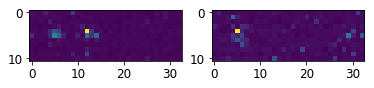

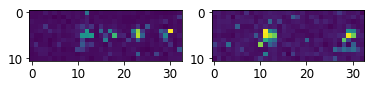

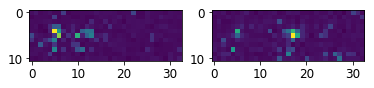

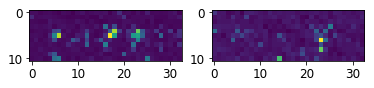

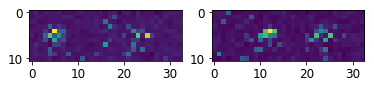

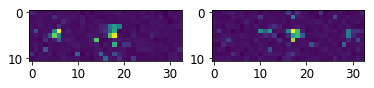

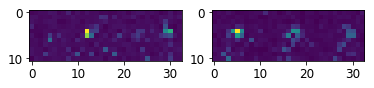

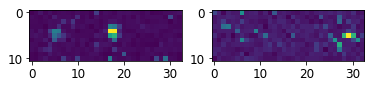

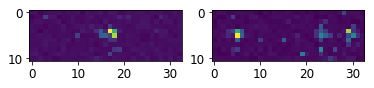

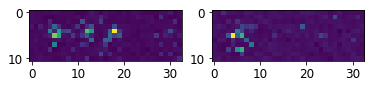

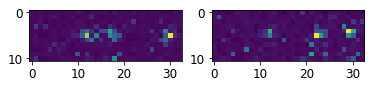

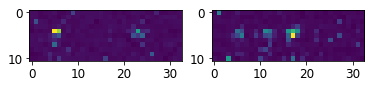

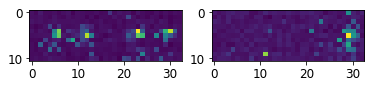

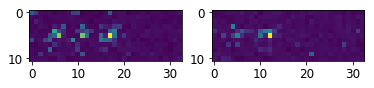

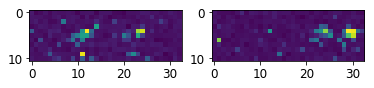

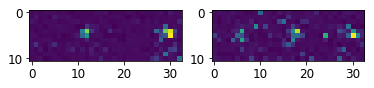

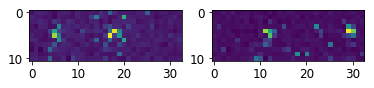

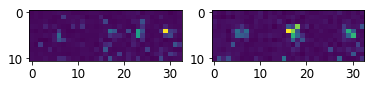

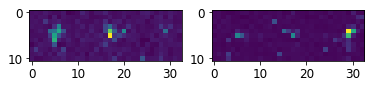

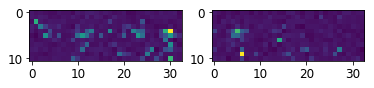

read 2 data points with 100 repetitions (None points, 100 repetitions requested)
image width 9 pixels from 0 to 8
image width 6 pixels from 9 to 14
image width 6 pixels from 15 to 20
image width 6 pixels from 21 to 26
image width 6 pixels from 27 to 32

211909


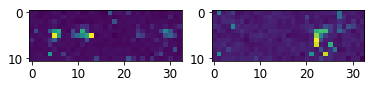

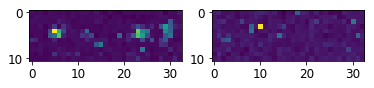

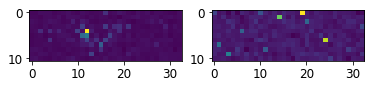

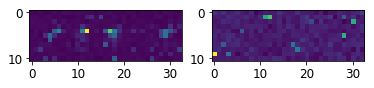

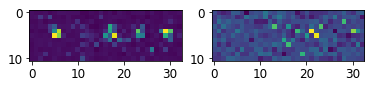

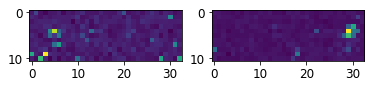

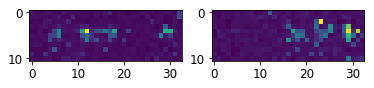

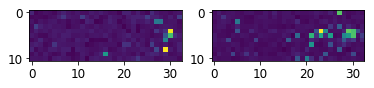

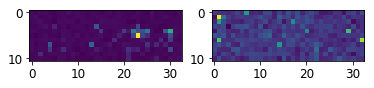

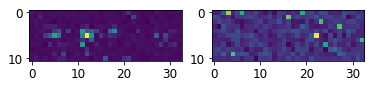

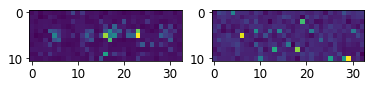

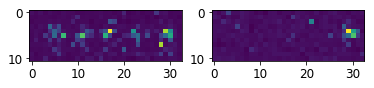

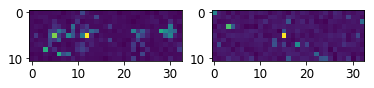

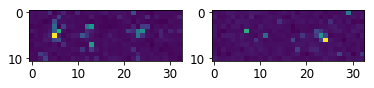

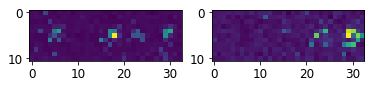

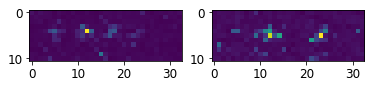

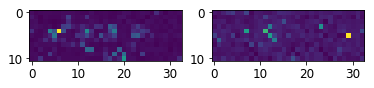

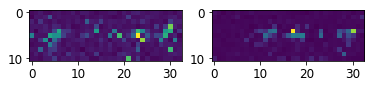

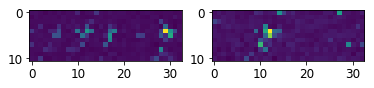

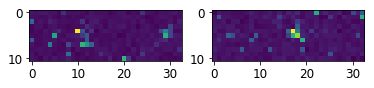

read 2 data points with 100 repetitions (None points, 100 repetitions requested)
image width 9 pixels from 0 to 8
image width 6 pixels from 9 to 14
image width 6 pixels from 15 to 20
image width 6 pixels from 21 to 26
image width 6 pixels from 27 to 32

211939


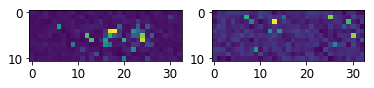

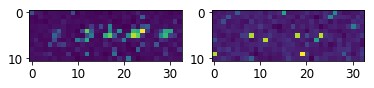

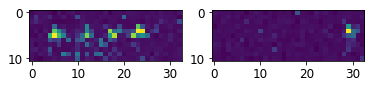

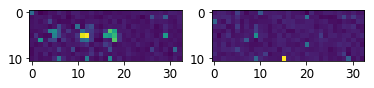

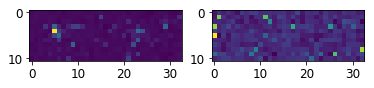

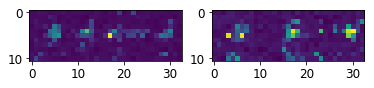

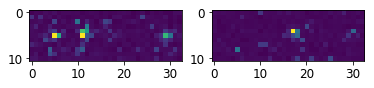

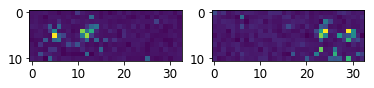

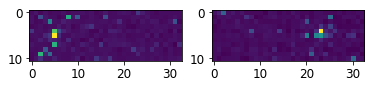

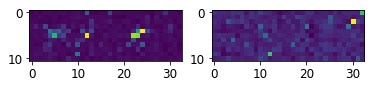

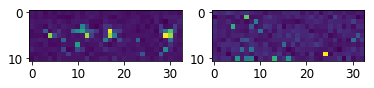

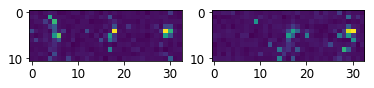

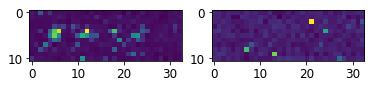

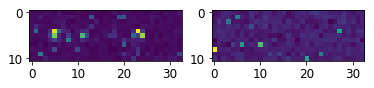

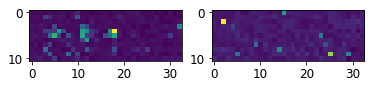

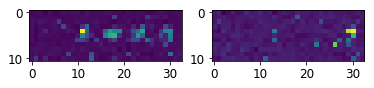

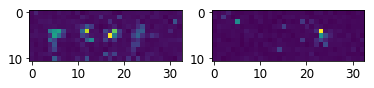

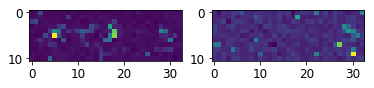

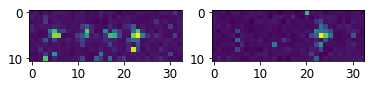

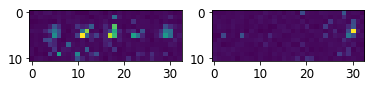

In [6]:
repetitions = 500 # during calibration
reps=100 # during testing

brightID = '210043'
darkID = '210005'

clf, div, scores = classifier_train2(ions,repetitions,img_shape,prefix,year,date,brightID,darkID)

fileID_Igor_list = ['210051', '210123', '210159', '211842', '211909', '211939']

for fileID_Igor in fileID_Igor_list:
    
    runAnalysisN(ions, prefix, year, date, fileID_Igor, reps, 1, img_shape, div, clf, points)
    zf =prefix + year+ '/' + date + '/' + date +'-'+fileID_Igor +'/cimg' + date + '-' + fileID_Igor + '.dat'
    datacube = pd.read_csv(str(zf), sep="\t", header=None)
    
    print()
    print(fileID_Igor)
        
    for n in range(0, 100, 5):
        
        fig = plt.figure()
        
        for idx in range(2):
            ax = fig.add_subplot(1, 2, idx + 1)
            pic = datacube.values[idx, n*363 : n*363 + 363].reshape(11,33)
            ax.imshow(pic)
        
        plt.show()

### Riddhi_SLAM  Set #2

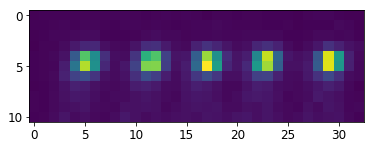

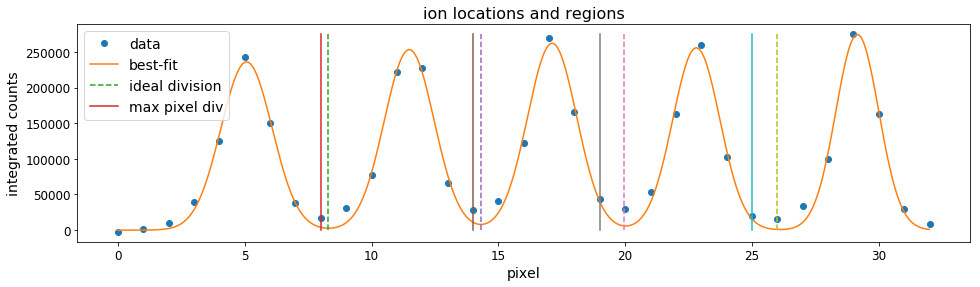

Ion 0
image width 9 pixels from 0 to 8
Cross-validation accuracy: 0.948 +/- 0.024
Ion 1
image width 6 pixels from 9 to 14
Cross-validation accuracy: 0.955 +/- 0.022
Ion 2
image width 5 pixels from 15 to 19
Cross-validation accuracy: 0.952 +/- 0.021
Ion 3
image width 6 pixels from 20 to 25
Cross-validation accuracy: 0.950 +/- 0.021
Ion 4
image width 7 pixels from 26 to 32
Cross-validation accuracy: 0.950 +/- 0.021
read 2 data points with 100 repetitions (None points, 100 repetitions requested)
image width 9 pixels from 0 to 8
image width 6 pixels from 9 to 14
image width 5 pixels from 15 to 19
image width 6 pixels from 20 to 25
image width 7 pixels from 26 to 32

213257


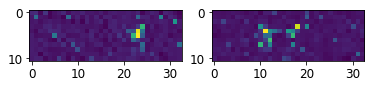

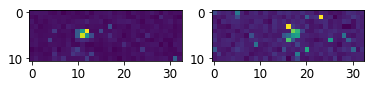

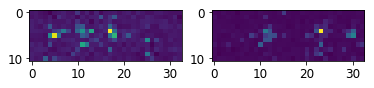

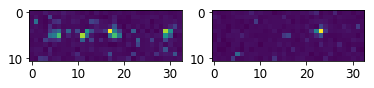

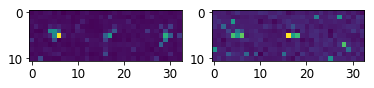

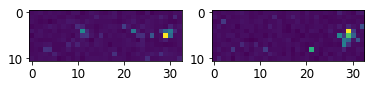

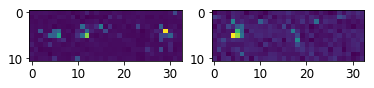

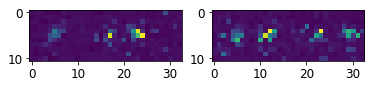

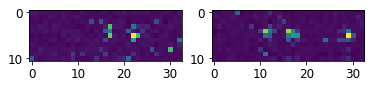

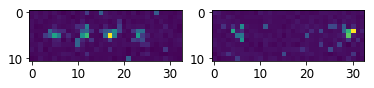

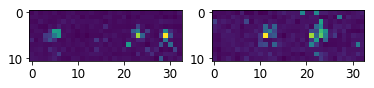

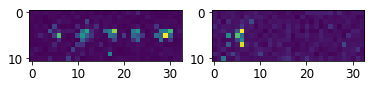

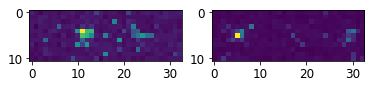

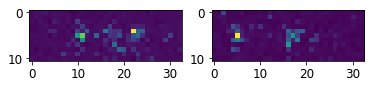

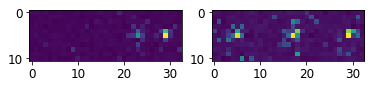

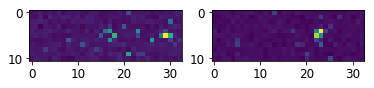

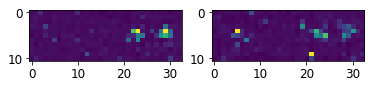

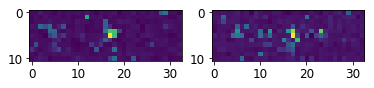

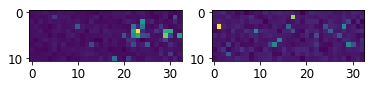

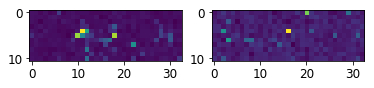

read 2 data points with 100 repetitions (None points, 100 repetitions requested)
image width 9 pixels from 0 to 8
image width 6 pixels from 9 to 14
image width 5 pixels from 15 to 19
image width 6 pixels from 20 to 25
image width 7 pixels from 26 to 32

213331


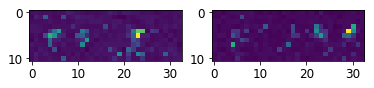

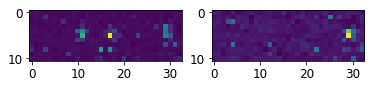

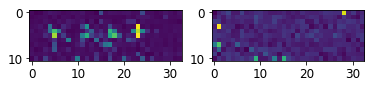

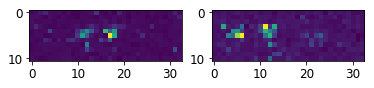

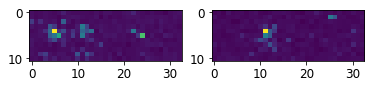

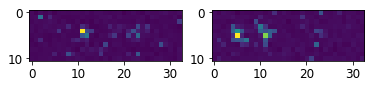

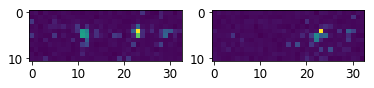

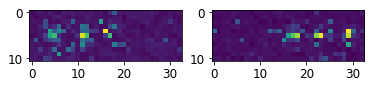

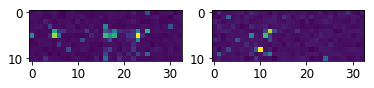

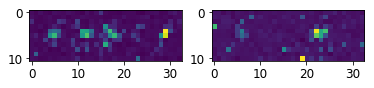

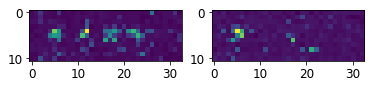

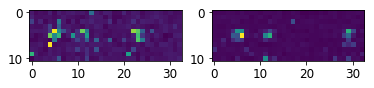

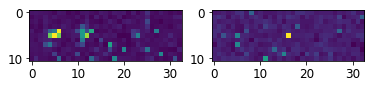

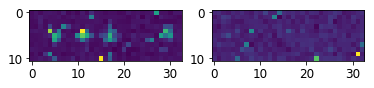

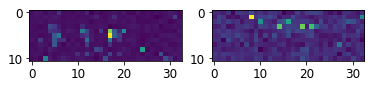

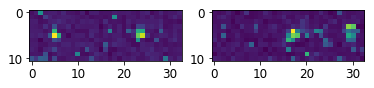

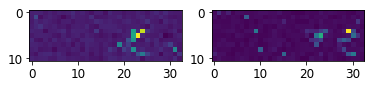

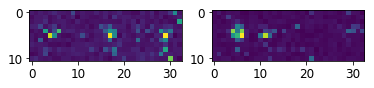

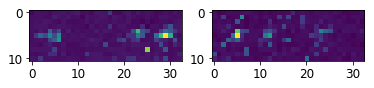

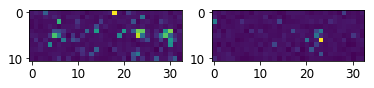

read 2 data points with 100 repetitions (None points, 100 repetitions requested)
image width 9 pixels from 0 to 8
image width 6 pixels from 9 to 14
image width 5 pixels from 15 to 19
image width 6 pixels from 20 to 25
image width 7 pixels from 26 to 32

213408


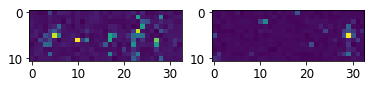

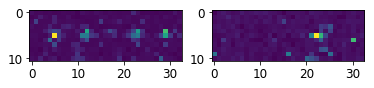

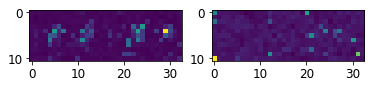

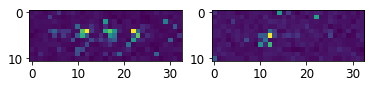

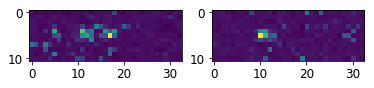

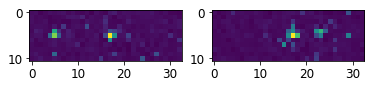

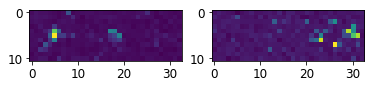

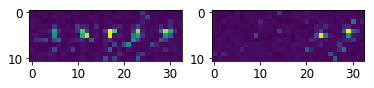

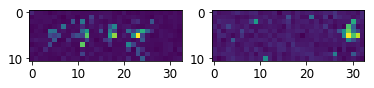

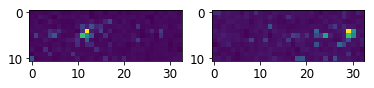

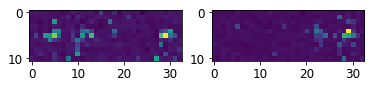

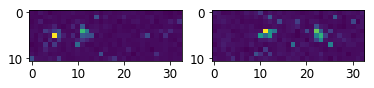

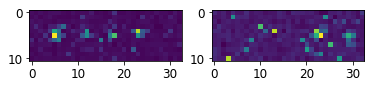

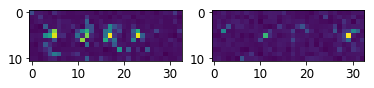

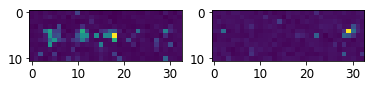

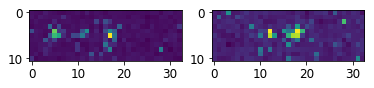

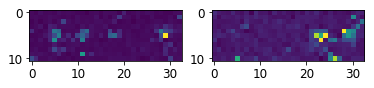

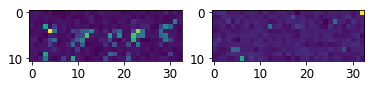

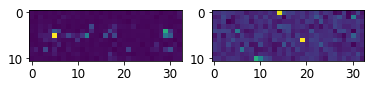

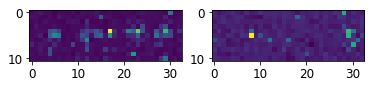

In [7]:
repetitions = 500
reps=100
brightID = '213249'
darkID = '213211'

clf, div, scores = classifier_train2(ions,repetitions,img_shape,prefix,year,date,brightID,darkID)

fileID_Igor_list = ['213257', '213331', '213408']

for fileID_Igor in fileID_Igor_list:
    
    runAnalysisN(ions, prefix, year, date, fileID_Igor, reps, 1, img_shape, div, clf, points)
    zf =prefix + year+ '/' + date + '/' + date +'-'+fileID_Igor +'/cimg' + date + '-' + fileID_Igor + '.dat'
    datacube = pd.read_csv(str(zf), sep="\t", header=None)
    
    print()
    print(fileID_Igor)
        
    for n in range(0, 100, 5):
        
        fig = plt.figure()
        
        for idx in range(2):
            ax = fig.add_subplot(1, 2, idx + 1)
            pic = datacube.values[idx, n*363 : n*363 + 363].reshape(11,33)
            ax.imshow(pic)
        
        plt.show()

### Riddhi_SLAM  Set #3

In [8]:
repetitions = 500
reps=100
brightID = '214921'
darkID = '214856'

clf, div, scores = classifier_train2(ions,repetitions,img_shape,prefix,year,date,brightID,darkID)

fileID_Igor_list = ['215255', '215322', '215351']
fileID_Igor_list += ['222553', '222709', '222738']
fileID_Igor_list += ['222738', '225609', '225640']
fileID_Igor_list += ['232908', '232935', '233005']
fileID_Igor_list += ['235431', '235456', '235527']

for fileID_Igor in fileID_Igor_list:
    
    runAnalysisN(ions, prefix, year, date, fileID_Igor, reps, 1, img_shape, div, clf, points)
    zf = prefix + year+ '/' + date + '/' + date +'-'+fileID_Igor +'/cimg' + date + '-' + fileID_Igor + '.dat'
    datacube = pd.read_csv(str(zf), sep="\t", header=None)
    
    print()
    print(fileID_Igor)
        
    for n in range(0, 100, 5):
        
        fig = plt.figure()
        
        for idx in range(2):
            ax = fig.add_subplot(1, 2, idx + 1)
            pic = datacube.values[idx, n*363 : n*363 + 363].reshape(11,33)
            ax.imshow(pic)
        
        plt.show()

FileNotFoundError: [Errno 2] No such file or directory: 'Riddhi_SLAM/2018/20181008/ROI_ref_bright_11x33_500_cyc_214921.txt.zip'